In [154]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


##  Rainfall

In [0]:
from pandas import read_csv 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import json

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.layers import *
from keras.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.optimizers import Adam
import keras.backend as K

In [0]:
dic = {}
for i in df["SUBDIVISION"].unique():
    x = open('/content/drive/My Drive/un/Files/'+i+'.json', 'r').read()
    x = json.loads(x)
    dic.update(x)

with open('/content/drive/My Drive/un/rainfall_region.json', 'w') as f:
    json.dump(dic,f)

In [0]:
df = read_csv('/content/drive/My Drive/un/Sub_Division_IMD_2017.csv')

In [0]:
all_data = df.values
df["SUBDIVISION"].unique()

dic = {}
for i in df["SUBDIVISION"].unique():
    dic[i] = []

In [0]:
print(dic)

{'Andaman & Nicobar Islands': [], 'Arunachal Pradesh': [], 'Assam & Meghalaya': [], 'Naga Mani Mizo Tripura': [], 'Sub Himalayan West Bengal & Sikkim': [], 'Gangetic West Bengal': [], 'Orissa': [], 'Jharkhand': [], 'Bihar': [], 'East Uttar Pradesh': [], 'West Uttar Pradesh': [], 'Uttarakhand': [], 'Haryana Delhi & Chandigarh': [], 'Punjab': [], 'Himachal Pradesh': [], 'Jammu & Kashmir': [], 'West Rajasthan': [], 'East Rajasthan': [], 'West Madhya Pradesh': [], 'East Madhya Pradesh': [], 'Gujarat Region': [], 'Saurashtra & Kutch': [], 'Konkan & Goa': [], 'Madhya Maharashtra': [], 'Matathwada': [], 'Vidarbha': [], 'Chhattisgarh': [], 'Coastal Andhra Pradesh': [], 'Telangana': [], 'Rayalseema': [], 'Tamil Nadu': [], 'Coastal Karnataka': [], 'North Interior Karnataka': [], 'South Interior Karnataka': [], 'Kerala': [], 'Lakshadweep': []}


In [0]:
for i in all_data:
    for j in i[2:14]:
        dic[i[0]].append(j)

In [0]:
print(dic['Andaman & Nicobar Islands'])

[49.2, 87.1, 29.2, 2.3, 528.8, 517.5, 365.1, 481.1, 332.6, 388.5, 558.2, 33.6, 0.0, 159.8, 12.2, 0.0, 446.1, 537.1, 228.9, 753.7, 666.2, 197.2, 359.0, 160.5, 12.7, 144.0, 0.0, 1.0, 235.1, 479.9, 728.4, 326.7, 339.0, 181.2, 284.4, 225.0, 9.4, 14.7, 0.0, 202.4, 304.5, 495.1, 502.0, 160.1, 820.4, 222.2, 308.7, 40.1, 1.3, 0.0, 3.3, 26.9, 279.5, 628.7, 368.7, 330.5, 297.0, 260.7, 25.4, 344.7, 36.6, 0.0, 0.0, 0.0, 556.1, 733.3, 247.7, 320.5, 164.3, 267.8, 128.9, 79.2, 110.7, 0.0, 113.3, 21.6, 616.3, 305.2, 443.9, 377.6, 200.4, 264.4, 648.9, 245.6, 20.9, 85.1, 0.0, 29.0, 562.0, 693.6, 481.4, 699.9, 428.8, 170.7, 208.1, 196.9, 26.6, 22.7, 206.3, 89.3, 224.5, 472.7, 264.3, 337.4, 626.6, 208.2, 267.3, 153.5, 0.0, 8.4, 0.0, 122.5, 327.3, 649.0, 253.0, 187.1, 464.5, 333.8, 94.5, 247.1, 583.7, 0.8, 0.0, 21.9, 140.7, 549.8, 468.9, 370.3, 386.2, 318.7, 117.2, 2.3, 84.8, 0.5, 1.3, 2.5, 190.7, 530.0, 280.8, 205.8, 580.1, 288.8, 133.0, 67.5, 0.0, 0.0, 0.0, 37.7, 298.8, 383.3, 792.8, 520.5, 310.8, 139.8,

In [0]:
for i in dic.keys():
    dic[i] = np.array(dic[i])

In [0]:
def create_dataset(data, k):
    dataX, dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i + k, 0]
        y = data[i + k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)

def everything(state, data):
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

    data = imp_mean.fit_transform(data.reshape(-1,1))
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    look_back = 60
    look_ahead = 12
    trainX, trainY = split_sequence(data, look_back, look_ahead)
    
    trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    trainY = trainY.reshape((trainY.shape[0],trainY.shape[1]))
    
    K.clear_session()

    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(60, input_shape=(look_back, 1)))
    model.add(Dense(32))
    model.add(Dropout(0.25))
    model.add(Dense(16))
    model.add(Dropout(0.25))
    model.add(Dense(12))
#     model.summary()
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.fit(trainX, trainY, epochs=10, batch_size=60, verbose=0)
    
#     adam = Adam(lr=0.001)
#     model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
#     model.fit(trainX, trainY, epochs=5, batch_size=60, verbose=0)
    
    adam = Adam(lr=0.0001)
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
    model.fit(trainX, trainY, epochs=5, batch_size=60, verbose=0)
    
    trainPredict = model.predict(trainX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainTrue = scaler.inverse_transform(trainY)
    train_rmse = np.sqrt(np.sum((trainTrue-trainPredict)**2)/trainTrue.shape[0])
    print(train_rmse)

#     model.save('/content/drive/My Drive/un/Models/'+state+'.h5')

    return model

def split_sequence_2(sequence, n_steps_in, n_steps_out):
    X = list()
    
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        
        # gather input and output parts of the pattern
        seq_x = sequence[i:end_ix]
        X.append(seq_x)
        
    return np.array(X)

def saveJSON(state, data, model):
    data = data[-60:]
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

    data = imp_mean.fit_transform(data.reshape(-1,1))
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    look_back = 60
    look_ahead = 12
#     trainX = np.array(split_sequence_2(data, look_back, look_ahead))
#     print(trainX.shape)
    
    trainX = data
    trainX = np.reshape(trainX, (trainX.shape[1], trainX.shape[0], 1))
    
    trainPredict = model.predict(trainX)
    trainPredict = scaler.inverse_transform(trainPredict)
    
    sd = {
        state : {}
    }
    
    dicm =["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"]
    
    trainPredict = trainPredict.reshape((-1,))
    for i in range(12):
        sd[state][dicm[i]] = str(trainPredict[i])
        
    with open('/content/drive/My Drive/un/Files/'+state+'.json', 'w') as f:
        json.dump(sd,f)

In [0]:
for i in dic.keys():
    print(i,end=" : ")
    model = everything(i,dic[i])
    saveJSON(i, dic[i], model)

# model = everything("Andaman & Nicobar Islands", dic["Andaman & Nicobar Islands"])

Andaman & Nicobar Islands : 468.5780856642025
Arunachal Pradesh : 632.6742560241617
Assam & Meghalaya : 321.58819939566763
Naga Mani Mizo Tripura : 323.72310354479134
Sub Himalayan West Bengal & Sikkim : 432.3704462780954
Gangetic West Bengal : 266.35793597467267
Orissa : 275.8592401280728
Jharkhand : 272.1362501065052
Bihar : 265.60393811561454
East Uttar Pradesh : 249.60891280379545
West Uttar Pradesh : 248.9442230291839
Uttarakhand : 345.8290250995157
Haryana Delhi & Chandigarh : 180.8800580678344
Punjab : 201.50289390999438
Himachal Pradesh : 314.3699849133954
Jammu & Kashmir : 257.08046311748933
West Rajasthan : 124.60874710876202
East Rajasthan : 200.89572806062182
West Madhya Pradesh : 251.48837371103636
East Madhya Pradesh : 318.34306007061804
Gujarat Region : 345.82259844333396
Saurashtra & Kutch : 228.14341355724176
Konkan & Goa : 784.941999754052
Madhya Maharashtra : 199.29998908757304
Matathwada : 205.53017169334356
Vidarbha : 262.61463914062364
Chhattisgarh : 290.199621464

In [0]:
def split_sequence_2(sequence, n_steps_in, n_steps_out):
    X = list()
    
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        
        # gather input and output parts of the pattern
        seq_x = sequence[i:end_ix]
        X.append(seq_x)
        
    return np.array(X)

def saveJSON(state, data, model):
    data = data[-60:]
    print(data.shape)
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

    data = imp_mean.fit_transform(data.reshape(-1,1))
    print(data.shape)
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    print(data.shape)
    
    look_back = 60
    look_ahead = 12
#     trainX = np.array(split_sequence_2(data, look_back, look_ahead))
#     print(trainX.shape)
    
    trainX = data
    trainX = np.reshape(trainX, (trainX.shape[1], trainX.shape[0], 1))
    print(trainX.shape)
    
    trainPredict = model.predict(trainX)
    trainPredict = scaler.inverse_transform(trainPredict)
    
    sd = {
        state : {}
    }
    
    dicm =["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"]
    
    trainPredict = trainPredict.reshape((-1,))
    for i in range(12):
        sd[state][dicm[i]] = str(trainPredict[i])
        
    with open('/content/drive/My Drive/un/file.json', 'w') as f:
        json.dump(sd,f)

saveJSON("Andaman & Nicobar Islands", dic["Andaman & Nicobar Islands"], model)

(60,)
(60, 1)
(60, 1)
(1, 60, 1)


In [0]:
all_data = df.values
data = []

for i in all_data:
    if i[0]=="Haryana Delhi & Chandigarh":
        for j in i[2:14]:
            data.append(j)

data = np.array(data)
print(data.shape)
print(data)

(1404,)
[35.4 28.9 11.1 ...  0.   1.8  4.2]


In [0]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp_mean.fit(data)

data = imp_mean.fit_transform(data.reshape(-1,1)).reshape(-1,)
print(data.shape)
print(data)

(1404,)
[35.4 28.9 11.1 ...  0.   1.8  4.2]


In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data.reshape((-1,1)))

In [0]:
# dataset = data.reshape(-1,1)
print(dataset)

[[0.08734271]
 [0.07130521]
 [0.02738712]
 ...
 [0.        ]
 [0.00444115]
 [0.01036269]]


In [0]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

940 464


In [0]:
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [0]:
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [0]:
K.clear_session()

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(12, input_shape=(look_back, 1)))
model.add(Dense(8))
model.add(Dropout(0.25))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 12)                672       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [0]:
adam = Adam(lr=0.00001)

model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
model.fit(trainX, trainY, epochs=5, batch_size=1)

Epoch 1/5
927/927 [==============================] - 29s 31ms/step - loss: 0.0139 - acc: 0.0766
Epoch 2/5
927/927 [==============================] - 28s 30ms/step - loss: 0.0136 - acc: 0.0766
Epoch 3/5
927/927 [==============================] - 27s 29ms/step - loss: 0.0135 - acc: 0.0766
Epoch 4/5
927/927 [==============================] - 27s 29ms/step - loss: 0.0135 - acc: 0.0766
Epoch 5/5
927/927 [==============================] - 27s 29ms/step - loss: 0.0130 - acc: 0.0766


In [0]:
model.save('/content/drive/My Drive/un/Haryana_Model_2.h5')
# model = load_model('/content/drive/My Drive/un/Haryana_Model.h5')

In [0]:
x = model.predict(testX)

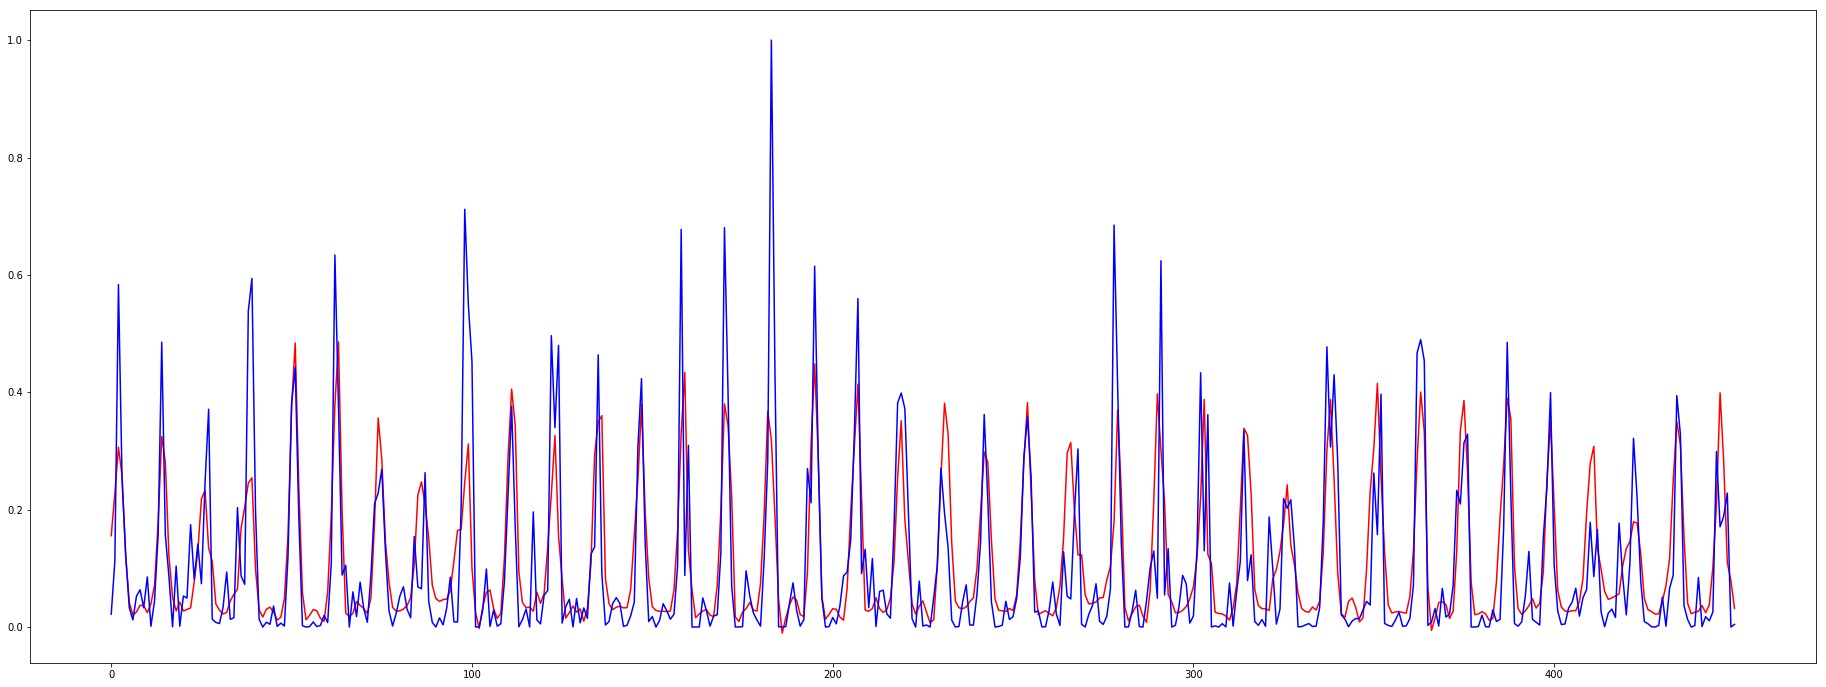

In [0]:
xx = x.reshape(-1,)

plt.figure(figsize=(32,12))
plt.plot(np.arange(0,xx.shape[0]),xx, c='red')
plt.plot(np.arange(0,xx.shape[0]),testY, c='blue')
plt.show()

In [0]:
# make predictions
import numpy
import math

testPredict = model.predict(testX)


xtestPredict = scaler.inverse_transform(testPredict)
xtestY = scaler.inverse_transform(testY.reshape(-1,1))

print(xtestPredict.shape)
print(xtestY.shape)

testScore = math.sqrt(np.square(np.subtract(xtestY, xtestPredict)).mean())
print('Test Score: %.2f RMSE' % (testScore))

(451, 1)
(451, 1)
Test Score: 41.85 RMSE


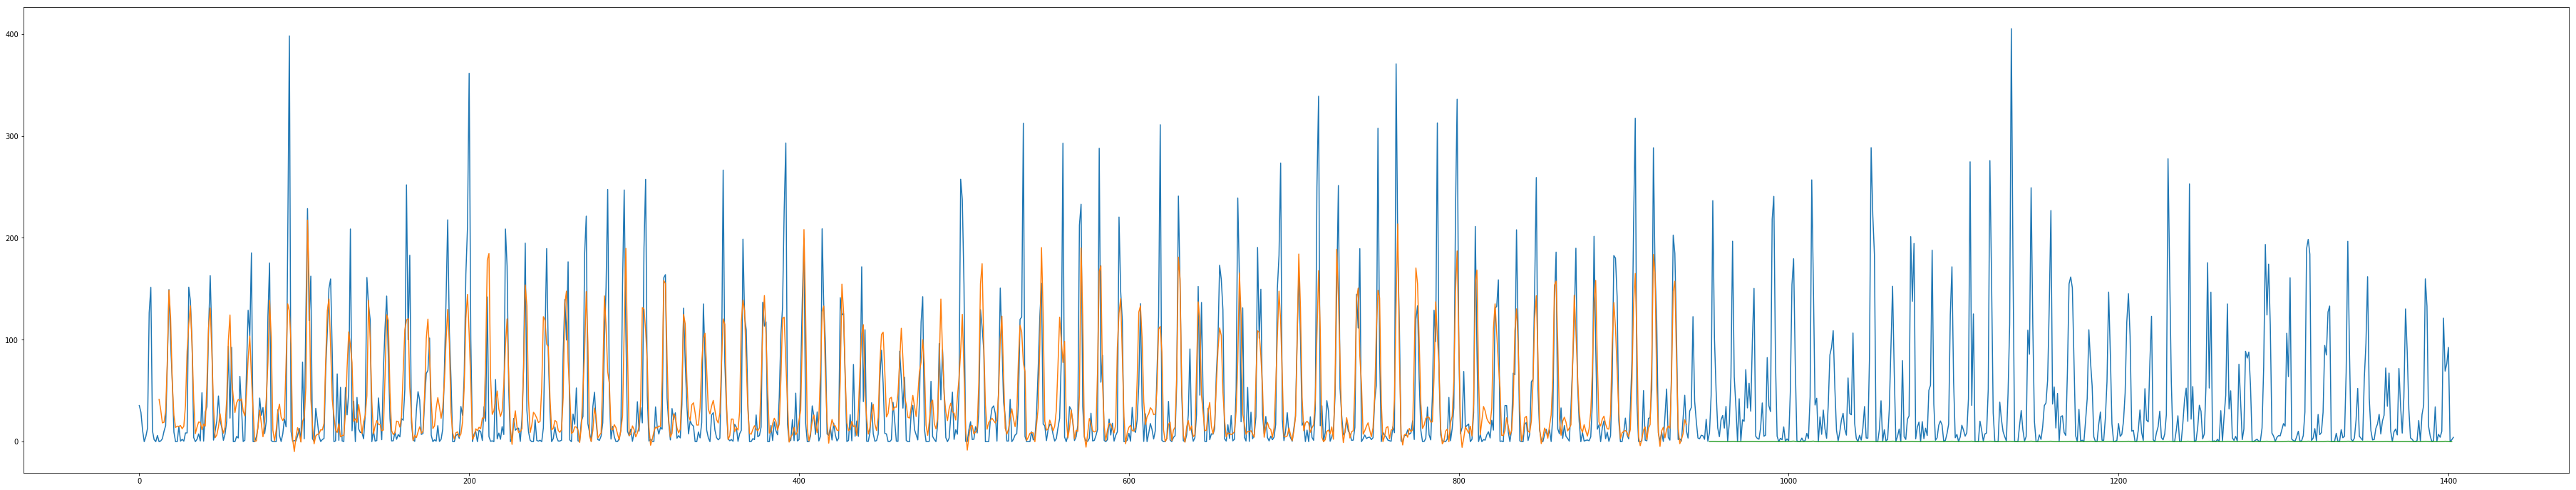

In [0]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions

plt.figure(figsize=(64,12))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [0]:
Counter(df['SUBDIVISION'])

Counter({'Andaman & Nicobar Islands': 112,
         'Arunachal Pradesh': 99,
         'Assam & Meghalaya': 117,
         'Bihar': 117,
         'Chhattisgarh': 117,
         'Coastal Andhra Pradesh': 117,
         'Coastal Karnataka': 117,
         'East Madhya Pradesh': 117,
         'East Rajasthan': 117,
         'East Uttar Pradesh': 117,
         'Gangetic West Bengal': 117,
         'Gujarat Region': 117,
         'Haryana Delhi & Chandigarh': 117,
         'Himachal Pradesh': 117,
         'Jammu & Kashmir': 117,
         'Jharkhand': 117,
         'Kerala': 117,
         'Konkan & Goa': 117,
         'Lakshadweep': 116,
         'Madhya Maharashtra': 117,
         'Matathwada': 117,
         'Naga Mani Mizo Tripura': 117,
         'North Interior Karnataka': 117,
         'Orissa': 117,
         'Punjab': 117,
         'Rayalseema': 117,
         'Saurashtra & Kutch': 117,
         'South Interior Karnataka': 117,
         'Sub Himalayan West Bengal & Sikkim': 117,
         'Ta

In [0]:
l=[]
k=-1
for i in df['SUBDIVISION']:
    k=k+1
    if i=='Coastal Karnataka':
        l.append(k)

In [0]:
df['SUBDIVISION'][4071]

'Kerala'

In [0]:
df1=df.iloc[3955:4072:,:]

In [0]:
# fig = plt.figure(figsize=(16,10))
# ax = fig.add_subplot(111)
# dfg = df1.groupby('YEAR').sum()['ANNUAL']
# dfg.plot('line', title='Overall Rainfall in Each Year IN Kerala', fontsize=20)
# plt.ylabel('Overall Rainfall (mm)')
# ax.title.set_fontsize(30)
# ax.xaxis.label.set_fontsize(20)
# ax.yaxis.label.set_fontsize(20)
# print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
# print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
# print('Mean: ' + str(dfg.mean()))

In [0]:
df1=df1.drop(['SUBDIVISION','YEAR','ANNUAL','JF','MAM','JJAS','OND'],axis=1)

In [0]:
df1=df1.T

In [0]:
# df1.head(12)

In [0]:
l=[]
for i in range(3955,4072):
    for j in range(0,12):
         l.append(df1[i][j])

In [0]:
df = pd.DataFrame(l)

In [0]:
values = df.values.astype('float32')
# values

In [0]:
train_size = int((values.shape[0] * 0.67))
test_size = values.shape[0]  - train_size
train = values[0:train_size]
test = values[train_size:]

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [0]:
# train

In [0]:
def create_dataset(data, k):
    dataX, dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i + k, 0]
        y = data[i + k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)


In [0]:
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# print(testX)

In [0]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# print(trainX.shape)
# print(testX.shape)

In [0]:
from keras.layers import Dense, SimpleRNN, Dropout,LSTM
from keras.metrics import mean_squared_error
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(SimpleRNN(80, input_shape=(look_back, 1)))
model.add(Dropout(0.25))
model.add(Dense(40))
model.add(Dropout(0.25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5,batch_size = 1)

W0820 15:43:20.772957 140490329409408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 15:43:20.830896 140490329409408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 15:43:20.838793 140490329409408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0820 15:43:21.007108 140490329409408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0820 15:43:21.019625 

Epoch 1/5
928/928 [==============================] - 16s 17ms/step - loss: 0.0249
Epoch 2/5
928/928 [==============================] - 12s 13ms/step - loss: 0.0160
Epoch 3/5
928/928 [==============================] - 12s 13ms/step - loss: 0.0149
Epoch 4/5
928/928 [==============================] - 12s 13ms/step - loss: 0.0150
Epoch 5/5
928/928 [==============================] - 13s 14ms/step - loss: 0.0140


In [0]:
model.save("/content/drive/My Drive/un/irrigation-crop/models/Coastal_Karnataka.h5")

In [0]:
testPredict = model.predict(testX)

In [0]:
# print(testPredict)

In [0]:
testPredict = scaler.inverse_transform(testPredict.reshape((-1,1))).ravel()
testTrue = scaler.inverse_transform(testY.reshape((-1,1))).ravel()

In [0]:
# print(testPredict[449:])
# print(testTrue[449:])
# print(testPredict.shape)
# print(np.sum(testPredict[456:460]))

In [0]:
kh = np.sum(testPredict[445:449])
ra = np.sum(testPredict[450:])
ra += np.sum(testPredict[440:442])

In [0]:
dicr = {"Coastal Karnataka":{
        "Rabi": str(ra), 
        "Kharif": str(kh*0.8)
}}

In [0]:
t = json.dumps(dicr)
print(t)

NameError: ignored

In [0]:
with open('/content/drive/My Drive/rainfall.json', 'w') as outfile:
    json.dump(dicr, outfile)

TypeError: ignored

## Crop dataset 

In [0]:
dic_crop = {
    "rice":{
        "type":"kharif",
        "rainfall":1700
    },
    "wheat":{
        "type":"rabi",
        "rainfall": 550
    },
        "maize":{
        "type":"kharif",
        "rainfall":650
    },
    "sugarcane":{
        "type":"kharif",
        "rainfall":2000
    },
        "cotton":{
        "type":"kharif",
        "rainfall":1000
    },
    "jowar":{
        "type":"kharif",
        "rainfall":700
    },    
    "grapes":{
        "type":"rabi",
        "rainfall":1700
    },
    "chillies":{
        "type":"rabi",
        "rainfall":250
    },
        "tea":{
        "type":"kharif",
        "rainfall":2250
    },
    "coffee":{
        "type":"kharif",
        "rainfall":2000
    }
}
print(dic_crop)

{'rice': {'type': 'kharif', 'rainfall': 1700}, 'wheat': {'type': 'rabi', 'rainfall': 550}, 'maize': {'type': 'kharif', 'rainfall': 650}, 'sugarcane': {'type': 'kharif', 'rainfall': 2000}, 'cotton': {'type': 'kharif', 'rainfall': 1000}, 'jowar': {'type': 'kharif', 'rainfall': 700}, 'grapes': {'type': 'rabi', 'rainfall': 1700}, 'chillies': {'type': 'rabi', 'rainfall': 250}, 'tea': {'type': 'kharif', 'rainfall': 2250}, 'coffee': {'type': 'kharif', 'rainfall': 2000}}


In [0]:
with open('/content/drive/My Drive/crop.json', 'w') as outfile:
    json.dump(dic_crop, outfile)

## Wind dataset

## Solar energy dataset